1. Classification: Telecom Churn Prediction

   •	Dataset: You can obtain a dataset containing historical customer data from a telecom company, including features such as call duration, monthly charges, contract type, usage patterns, customer demographics, etc. The target variable would be whether a customer churned or not (binary classification).

   •	Bayesian Classification: Use Bayesian Logistic Regression or Bayesian Neural Networks to predict the likelihood of churn for individual customers based on their features. Bayesian techniques can incorporate uncertainty into predictions and provide probabilistic estimates of churn probabilities.

   •	Evaluation: Evaluate the classification model using metrics like accuracy, precision, recall, F1-score, and ROC-AUC. Bayesian techniques can also provide uncertainty estimates for these metrics, allowing for more informative model evaluation


2. Regression: Customer Lifetime Value (CLV) Estimation

   •	Dataset: Utilize the same historical customer data but focus on different features and target variables. Features may include customer tenure, average monthly spending, acquisition channel, etc. The target variable would be the expected future revenue from each customer over their lifetime with the company.
   
   •	Bayesian Regression: Employ Bayesian Regression techniques such as Bayesian Linear Regression or Bayesian Additive Regression Trees (BART) to model the relationship between customer attributes and their lifetime value. Bayesian methods can handle uncertainty in parameter estimates and provide probabilistic predictions of CLV.
   
   •	Evaluation: Evaluate the regression model using metrics like mean squared error (MSE), mean absolute error (MAE), and R-squared. Bayesian techniques can provide credible intervals for these metrics, allowing for uncertainty quantification in CLV predictions.


### 1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
import pymc3 as pm
import missingno as msno
from collections import Counter
import theano.tensor as tt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import BayesianGaussianMixture
from sklearn.tree import DecisionTreeClassifier

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\Users\Home\AppData\Local\Programs\Python\Python311\Lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
c:\Users\Home\AppData\Local\Programs\Python\Python311\Lib\site-packages\theano\scalar\basic.py:2323: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  self.ctor = getattr(np, o_type.dtype)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

### 2. Exploratory data analysis

In [ ]:
# Create a dataframe from the raw telecom dataset and check the data format
telco_data = pd.read_csv("Telecom_customer churn.csv")
telco_data.head(5)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [ ]:
# Shape of the dataframe
print(telco_data.shape)

# Dimension of dataframe
print(telco_data.ndim)

# Size of the dataframe
print(telco_data.size)


(100000, 100)
2
10000000


In [ ]:
# Information about the data
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

Explanation of each column:

1.   rev_Mean: Average monthly revenue from the customer.

2.   mou_Mean: Average monthly minutes of usage by the customer.

3.   totmrc_Mean: Average monthly total recurring charge.

4.   da_Mean: Average monthly data usage.

5.   ovrmou_Mean: Average monthly overage minutes of usage.

6.   ovrrev_Mean: Average monthly overage revenue.

7.   vceovr_Mean: Average monthly voice overage minutes.

8.   datovr_Mean: Average monthly data overage usage.

9.   roam_Mean: Average monthly roaming minutes.

10.  change_mou: Change in monthly minutes of usage.

11.  change_rev: Change in monthly revenue.

12.  drop_vce_Mean: Average monthly dropped voice call minutes.

13.  drop_dat_Mean: Average monthly dropped data call minutes.

14.  blck_vce_Mean: Average monthly blocked voice call minutes.

15.  blck_dat_Mean: Average monthly blocked data call minutes.

16.  unan_vce_Mean: Average monthly unanswered voice call minutes.

17.  unan_dat_Mean: Average monthly unanswered data call minutes.

18.  plcd_vce_Mean: Average monthly placed voice call minutes.

19.  plcd_dat_Mean: Average monthly placed data call minutes.

20.  recv_vce_Mean: Average monthly received voice call minutes.

21.  recv_sms_Mean: Average monthly received SMS messages.

22.  comp_vce_Mean: Average monthly completed voice call minutes.

23.  comp_dat_Mean: Average monthly completed data call minutes.

24.  custcare_Mean: Average monthly customer care call minutes.

25.  ccrndmou_Mean: Average monthly customer care random minutes of usage.

26.  cc_mou_Mean: Average monthly customer care minutes of usage.

27.  inonemin_Mean: Average monthly one-minute call minutes.

28.  threeway_Mean: Average monthly three-way call minutes.

29.  mou_cvce_Mean: Average monthly call voice minutes.

30.  mou_cdat_Mean: Average monthly call data minutes.

31.  mou_rvce_Mean: Average monthly received voice minutes.

32.  owylis_vce_Mean: Average monthly on-way out voice call minutes.

33.  mouowylisv_Mean: Average monthly on-way out voice call minutes.

34.  iwylis_vce_Mean: Average monthly in-way out voice call minutes.

35.  mouiwylisv_Mean: Average monthly in-way out voice call minutes.

36.  peak_vce_Mean: Average monthly peak voice call minutes.

37.  peak_dat_Mean: Average monthly peak data call minutes.

38.  mou_peav_Mean: Average monthly peak voice call minutes.

39.  mou_pead_Mean: Average monthly peak data call minutes.

40.  opk_vce_Mean: Average monthly off-peak voice call minutes.

41.  opk_dat_Mean: Average monthly off-peak data call minutes.

42.  mou_opkv_Mean: Average monthly off-peak voice call minutes.

43.  mou_opkd_Mean: Average monthly off-peak data call minutes.

44.  drop_blk_Mean: Average monthly dropped or blocked call minutes.

45.  attempt_Mean: Average monthly call attempts.

46.  complete_Mean: Average monthly completed calls.

47.  callfwdv_Mean: Average monthly call forward voice minutes.

48.  callwait_Mean: Average monthly call wait minutes.

49.  churn: Binary indicator of whether the customer churned or not (1 = churned, 0 = not churned).

50.  months: Number of months the customer has been with the telecom company.

51.  uniqsubs: Number of unique subscriptions.

52.  actvsubs: Number of active subscriptions.

53.  new_cell: Binary indicator of whether the customer has a new cell (1 = new cell, 0 = not a new cell).

53.  crclscod: Code for customer class.

54.  asl_flag: Flag indicating the customer's ASL (Average Subscriber Line).

55.  totcalls: Total number of calls made.

56.  totmou: Total minutes of usage.

57.  totrev: Total revenue.

58.  adjrev: Adjusted revenue.

59.  adjmou: Adjusted minutes of usage.

60.  adjqty: Adjusted quantity.

61.  avgrev: Average revenue.

62.  avgmou: Average minutes of usage.

63.  avgqty: Average quantity.

64.  avg3mou: Average minutes of usage in the last 3 months.

65.  avg3qty: Average quantity in the last 3 months.

66.  avg3rev: Average revenue in the last 3 months.

67.  avg6mou: Average minutes of usage in the last 6 months.

68.  avg6qty: Average quantity in the last 6 months.

69.  avg6rev: Average revenue in the last 6 months.

70.  prizm_social_one: PRIZM social class.

71.  area: Area code.

72.  dualband: Binary indicator of whether the customer has dual-band capability (1 = dual band, 0 = not dual band).

73.  refurb_new: Binary indicator of whether the customer's phone is refurbished or new (1 = refurbished, 0 = new).

74.  hnd_price: Handset price.

75.  phones: Number of phones.

76.  models: Number of phone models.

77.  hnd_webcap: Handset web capability.

78.  truck: Binary indicator of whether the customer owns a truck (1 = owns a truck, 0 = does not own a truck).

79.  rv: Binary indicator of whether the customer owns a recreational vehicle (1 = owns an RV, 0 = does not own an RV).

80.  ownrent: Indicator of whether the customer owns or rents their dwelling.

81.  lor: Length of residence.

82.  dwlltype: Dwelling type.

83.  marital: Marital status.

84.  adults: Number of adults in the household.

85.  infobase: Information database.

86.  income: Household income.

87.  numbcars: Number of cars owned.

88.  HHstatin: Household status.

89.  dwllsize: Dwelling size.

90.  forgntvl: Foreign travel.

91.  ethnic: Ethnicity.

92.  kid0_2: Indicator of whether there are kids aged 0-2 in the household.

93.  kid3_5: Indicator of whether there are kids aged 3-5 in the household.

94.  kid6_10: Indicator of whether there are kids aged 6-10 in the household.

95.  kid11_15: Indicator of whether there are kids aged 11-15 in the household. 

96.  kid16_17: Indicator of whether there are kids aged 16-17 in the household.

97.  creditcd: Whether the customer possess a credit card in his/her name.

98.  eqpdays: How many days customer has had their equipment since the account is opened.

99.  Customer_ID: Unique ID for customer

In [ ]:
# Description of the dataframe for only object column
telco_data.describe(include=['O'])

,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
count,100000,100000,100000,92612,99960,99999,99999,89811,66294,68091,...,77921,62077,61692,98268,98268,98268,98268,98268,98268,98268
unique,3,54,2,5,19,4,2,3,2,2,...,2,6,15,17,2,2,2,2,2,2
top,U,AA,N,S,NEW YORK CITY AREA,Y,N,WCMB,O,S,...,M,C,A,N,U,U,U,U,U,Y
freq,66914,36509,86064,32097,11098,72265,85593,75733,64284,48759,...,77697,39124,47205,33389,94256,93572,90195,89454,88304,67234


In [ ]:
# Description of the dataframe for only numerical column
telco_data.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000,1.050000e+06
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


num of pepole who stay: 50326
num of pepole who churn: 49317


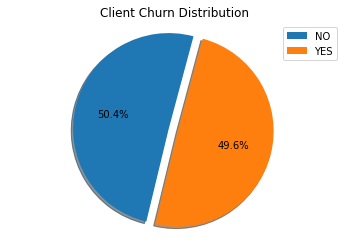

In [ ]:
stay = telco_data[(telco_data['churn'] == 0)].count()[1]
churn = telco_data[(telco_data['churn'] == 1)].count()[1]
print ("num of pepole who stay: "+ str(stay))
print ("num of pepole who churn: "+ str(churn))

# ratio of those who churn and those who don't
sizes = [48401,47647]
labels='NO','YES'
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',shadow=True, startangle=75 )
ax1.axis('equal') 
ax1.set_title("Client Churn Distribution")

ax1.legend(labels)

plt.show()

#### 2.1 Find missing values
a.  Find missing values

b.  Fill missing values

In [ ]:
telco_data.columns[telco_data.isnull().any()]

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'prizm_social_one',
       'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 'models',
       'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype', 'marital',
       'adults', 'infobase', 'income', 'numbcars', 'HHstatin', 'dwllsize',
       'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15',
       'kid16_17', 'creditcd', 'eqpdays'],
      dtype='object')

In [ ]:
# Features with missing values
miss = telco_data.isnull().sum().sort_values(ascending = False).head(44)
miss_per = (miss/len(telco_data))*100

# Percentage of missing values
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
numbcars,49366,49.366
dwllsize,38308,38.308
HHstatin,37923,37.923
ownrent,33706,33.706
dwlltype,31909,31.909
lor,30190,30.190
income,25436,25.436
adults,23019,23.019
infobase,22079,22.079
hnd_webcap,10189,10.189


In [ ]:
# Dropping the columns that seem to have no significant contribution to the model.
telco_data.drop(["Customer_ID"], axis = 1, inplace=True)
telco_data.drop(['numbcars','dwllsize','HHstatin','ownrent','dwlltype','lor','income','adults','prizm_social_one','infobase','crclscod'],axis=1,inplace=True)

In [ ]:
telco_data['hnd_webcap']=telco_data['hnd_webcap'].fillna('UNKW')

telco_data['avg6qty']=telco_data['avg6qty'].fillna(telco_data['avg6qty'].mean())
telco_data['avg6rev']=telco_data['avg6rev'].fillna(telco_data['avg6rev'].mean())
telco_data['avg6mou']=telco_data['avg6mou'].fillna(telco_data['avg6mou'].mean())

telco_data['change_mou']=telco_data['change_mou'].fillna(telco_data['change_mou'].mean())
telco_data['change_rev']=telco_data['change_rev'].fillna(telco_data['change_rev'].mean()) 

telco_data['rev_Mean']=telco_data['rev_Mean'].fillna(telco_data['rev_Mean'].mean())
telco_data['totmrc_Mean']=telco_data['totmrc_Mean'].fillna(telco_data['totmrc_Mean'].mean())
telco_data['da_Mean']=telco_data['da_Mean'].fillna(telco_data['da_Mean'].mean())
telco_data['ovrmou_Mean']=telco_data['ovrmou_Mean'].fillna(telco_data['ovrmou_Mean'].mean())
telco_data['ovrrev_Mean']=telco_data['ovrrev_Mean'].fillna(telco_data['ovrrev_Mean'].mean())
telco_data['vceovr_Mean']=telco_data['vceovr_Mean'].fillna(telco_data['vceovr_Mean'].mean())
telco_data['datovr_Mean']=telco_data['datovr_Mean'].fillna(telco_data['datovr_Mean'].mean())
telco_data['roam_Mean']=telco_data['roam_Mean'].fillna(telco_data['roam_Mean'].mean())
telco_data['mou_Mean']=telco_data['mou_Mean'].fillna(telco_data['mou_Mean'].mean())

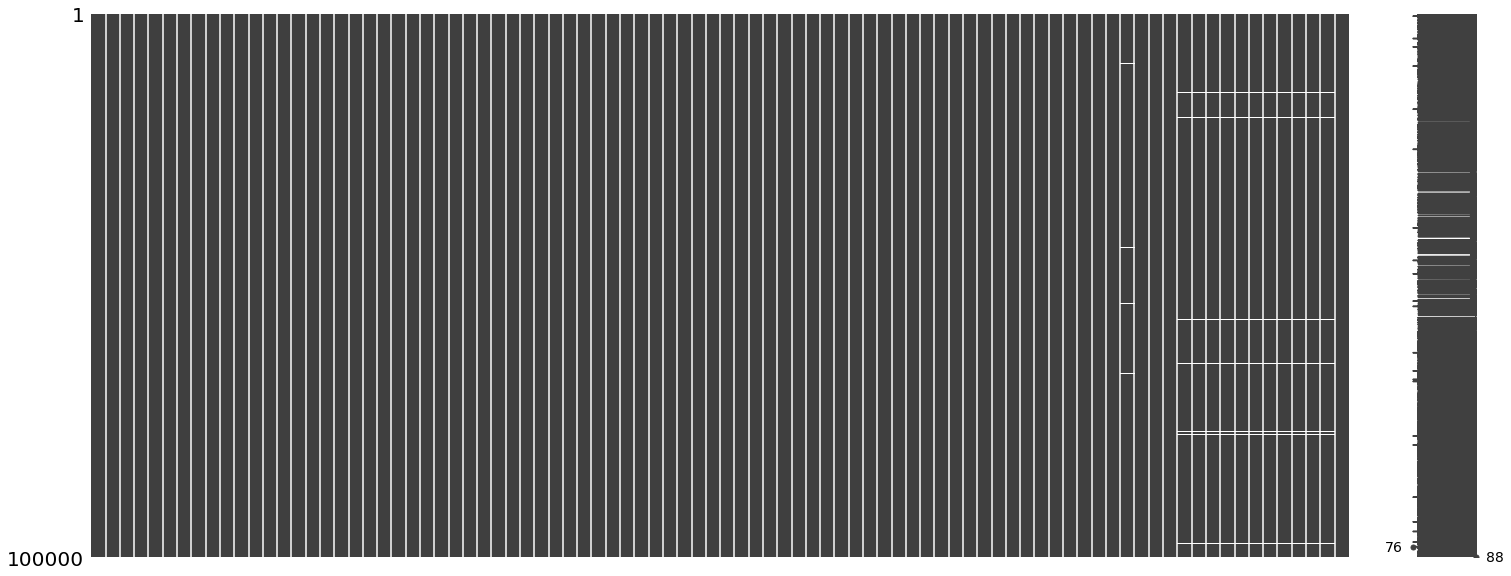

In [ ]:
#Visualization of NaN values
msno.matrix(telco_data);

In [ ]:
telco_data.dropna(inplace=True)

In [ ]:
sum(telco_data.isnull().sum()>0)

0

In [ ]:
# Find numerical columns
numerical_columns = telco_data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:")
print(numerical_columns)

Numerical columns:
Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev',
       'adjmou', 'adjq

In [ ]:
numerical_features = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev',
       'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty',
       'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones',
       'models', 'truck', 'rv', 'forgntvl', 'eqpdays']

##### 2.2 Find outliers

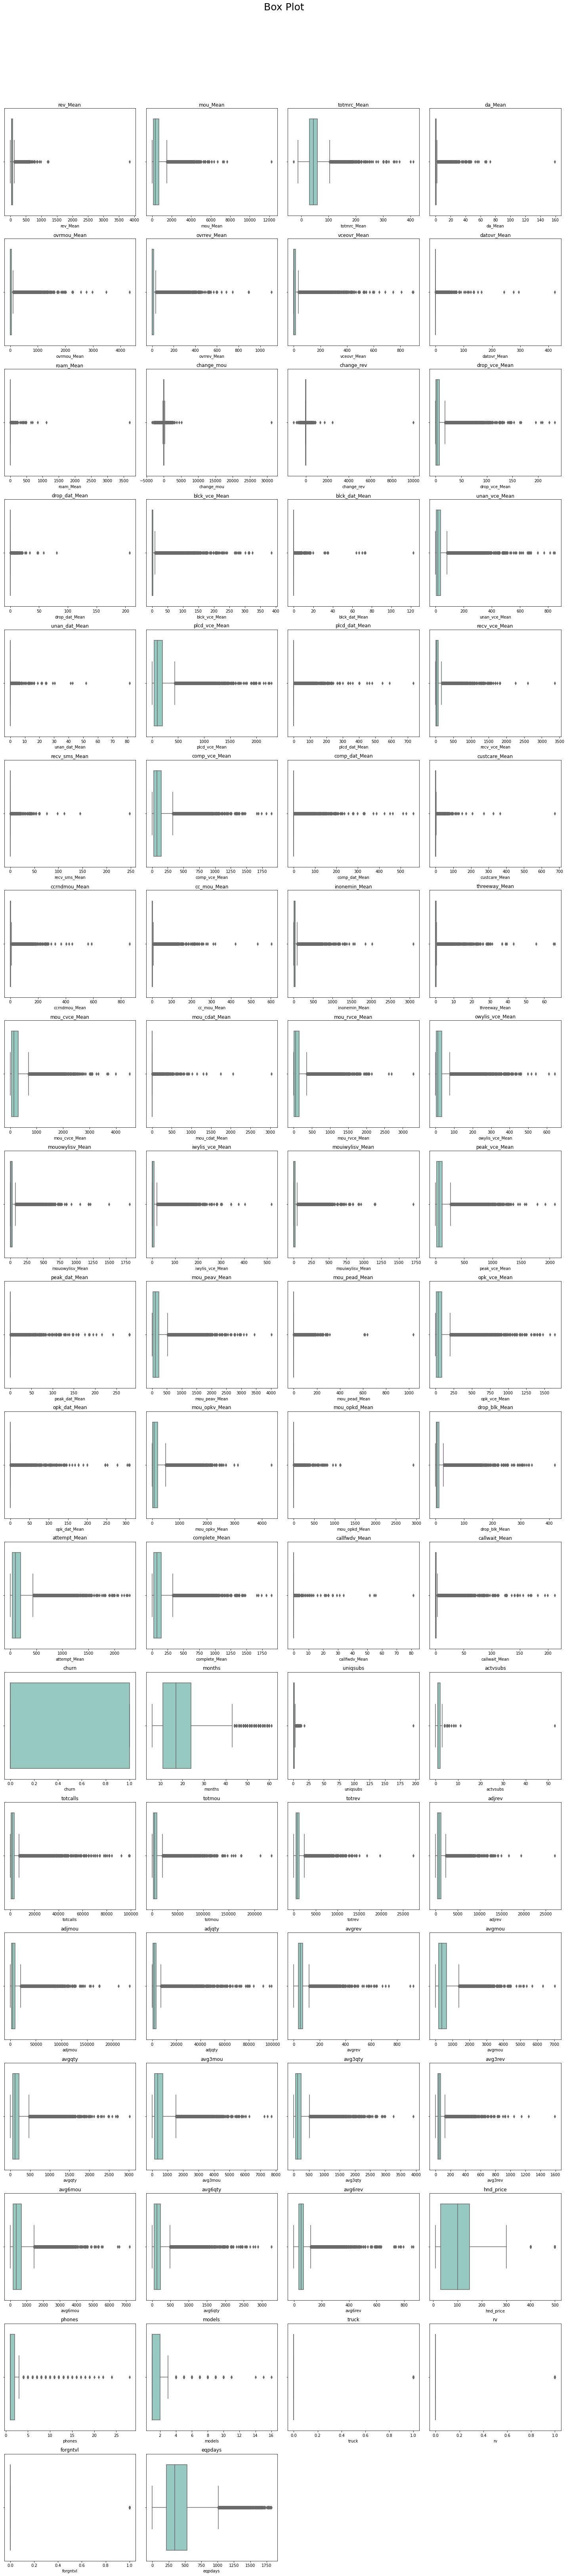

In [ ]:
# Adjust number of subplots based on the number of numerical features
num_plots = len(numerical_features)
num_rows = (num_plots // 4) + (num_plots % 4 > 0)

# Create subplots
fig, ax = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
ax = ax.flatten()

# Iterate over numerical features and create box plots
for i, c in enumerate(numerical_features):
    sns.boxplot(x=telco_data[c], ax=ax[i], palette='Set3')
    ax[i].set_title(c)  # Set title for each subplot

# Remove any extra subplots if needed
for j in range(num_plots, len(ax)):
    fig.delaxes(ax[j])

# Adjust layout and title
plt.suptitle('Box Plot', fontsize=25)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()



In [ ]:
def find_outliers(df, numerical_features, threshold=4):
    outliers = []
    for feature in numerical_features:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index.tolist()
        outliers.extend(feature_outliers)
    return list(set(outliers))

In [ ]:
outlier_indices = find_outliers(telco_data, numerical_features)
telco_data_outliers = telco_data.loc[outlier_indices]

In [ ]:
# Remove outliers from the DataFrame
telco_data_cleaned = telco_data.drop(index=outlier_indices)


In [ ]:
# Comparative shape of the dataframe
print(f"Actual: {telco_data.shape} Updated: {telco_data_cleaned.shape}")

# Comparative dimension of dataframe
print(f"Actual: {telco_data.ndim} Updated: {telco_data_cleaned.ndim}")

# Comparative size of the dataframe
print(f"Actual: {telco_data.size} Updated: {telco_data_cleaned.size}")

Actual: (97403, 88) Updated: (38235, 88)
Actual: 2 Updated: 2
Actual: 8571464 Updated: 3364680


It seems outliers are prevalent in the dataset even with higher threshold. Hence instead of finding outliers and removing them, we will use a method called "Winsorization" - It involves capping the extreme values of the dataset at a specified percentile, effectively reducing the influence of outliers while retaining the original data distribution. You can apply winsorization to your numerical features to mitigate the impact of outliers.

In [ ]:
def winsorize(df, numerical_features, lower_pct=0.05, upper_pct=0.95):
    """ This function performs capping the extreme values of the dataset at a specified percentile, 
    effectively reducing the influence of outliers while retaining the original data distribution. 
    You can apply winsorization to your numerical features to mitigate the impact of outliers."""
    
    winsorized_df = df.copy()
    for feature in numerical_features:
        lower_bound = winsorized_df[feature].quantile(lower_pct)
        upper_bound = winsorized_df[feature].quantile(upper_pct)
        winsorized_df[feature] = winsorized_df[feature].clip(lower=lower_bound, upper=upper_bound)
    return winsorized_df

In [ ]:
# Winsorize the numerical features of telco_data
telco_data_winsorized = winsorize(telco_data, numerical_features)

In [ ]:
# Shape of the dataframe
print(telco_data_winsorized.shape)

# Dimension of dataframe
print(telco_data_winsorized.ndim)

# Size of the dataframe
print(telco_data_winsorized.size)

(97403, 88)
2
8571464


### 3. Feature Engineering

In [ ]:
# Find object features in the DataFrame
object_features = telco_data_cleaned.select_dtypes(include='object').columns.tolist()

In [ ]:
# Display the object features
print("Object Features:", object_features)

Object Features: ['new_cell', 'asl_flag', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'marital', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']


#### 3.1 One hot encoding
Before looking at the correlation, let's make the categorical variables numerical with get_dummies.

In [ ]:
encoded_columns = []
for col in telco_data_cleaned.select_dtypes(include='object'):
    print(col, ': ', telco_data_cleaned[col].nunique())
    encoded_columns.append(col)
                                           

new_cell :  3
asl_flag :  2
area :  19
dualband :  3
refurb_new :  2
hnd_webcap :  3
marital :  5
ethnic :  17
kid0_2 :  2
kid3_5 :  2
kid6_10 :  2
kid11_15 :  2
kid16_17 :  2
creditcd :  2


one-hot encoding for variables with more than 2 categories

In [ ]:
telco_data_cleaned = pd.get_dummies(telco_data_cleaned, drop_first=True, columns=encoded_columns, prefix=encoded_columns)

In [ ]:
print(telco_data_cleaned.shape)

(38235, 126)


#### 3.2 Find correlation

In [ ]:
# Calculate the correlation matrix
correlation_matrix = telco_data_cleaned.corr()

# Sort the correlation matrix with respect to 'churn' in descending order
churn_correlation = correlation_matrix['churn'].drop('churn').sort_values(ascending=False)

# Display the correlation matrix
print(churn_correlation)

eqpdays          0.103517
hnd_webcap_WC    0.060602
ethnic_O         0.041668
marital_U        0.041634
refurb_new_R     0.040753
                   ...   
mou_opkd_Mean         NaN
callfwdv_Mean         NaN
truck                 NaN
rv                    NaN
forgntvl              NaN
Name: churn, Length: 125, dtype: float64


In [ ]:
values_sorted = telco_data_cleaned.corr()['churn'].abs().sort_values()
values_dict = dict(values_sorted.tail(40))
keys = values_dict.keys()
print(sorted(keys))

['asl_flag_Y', 'attempt_Mean', 'avg3mou', 'blck_dat_Mean', 'callfwdv_Mean', 'change_mou', 'churn', 'comp_dat_Mean', 'comp_vce_Mean', 'complete_Mean', 'datovr_Mean', 'drop_dat_Mean', 'dualband_Y', 'eqpdays', 'forgntvl', 'hnd_price', 'hnd_webcap_WC', 'hnd_webcap_WCMB', 'iwylis_vce_Mean', 'mou_Mean', 'mou_cdat_Mean', 'mou_cvce_Mean', 'mou_opkd_Mean', 'mou_opkv_Mean', 'mou_pead_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'opk_dat_Mean', 'opk_vce_Mean', 'owylis_vce_Mean', 'peak_dat_Mean', 'peak_vce_Mean', 'plcd_dat_Mean', 'plcd_vce_Mean', 'recv_sms_Mean', 'rv', 'totmrc_Mean', 'truck', 'unan_dat_Mean']


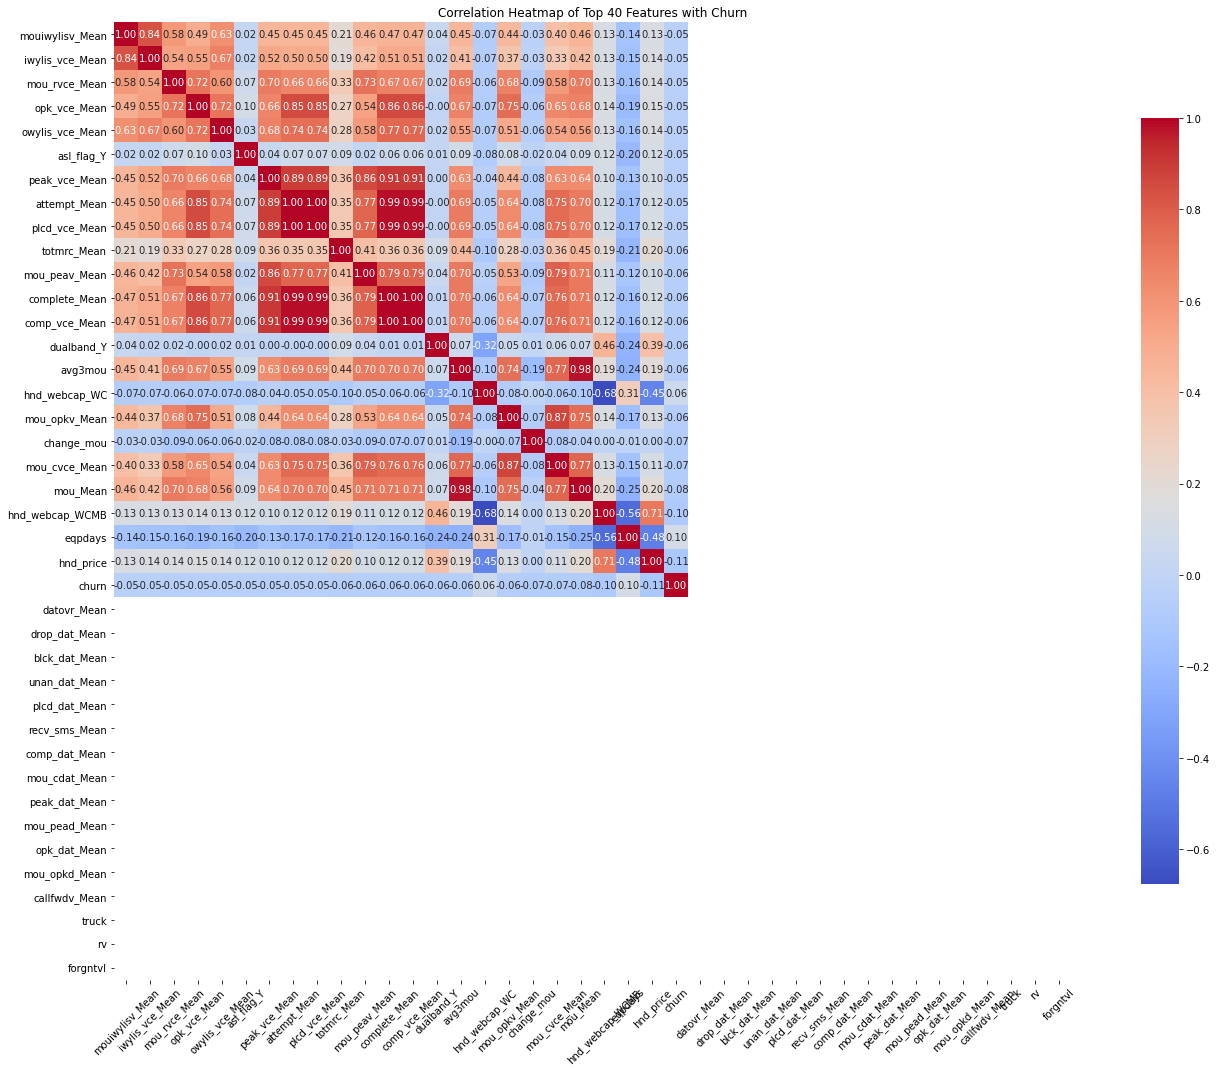

In [ ]:
top_40_features = list(values_sorted.tail(40).index)

# Create a correlation matrix for the top 40 features
correlation_matrix_top_40 = telco_data_cleaned[top_40_features].corr()

# Create the heatmap
plt.figure(figsize=(20, 15))  
sns.heatmap(correlation_matrix_top_40, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',  
            square=True,  
            cbar_kws={'shrink': 0.8}, 
            annot_kws={'size': 10},  
            )
plt.title('Correlation Heatmap of Top 40 Features with Churn')
plt.xticks(rotation=45)  
plt.yticks(rotation=0)   
plt.tight_layout()  
plt.show()

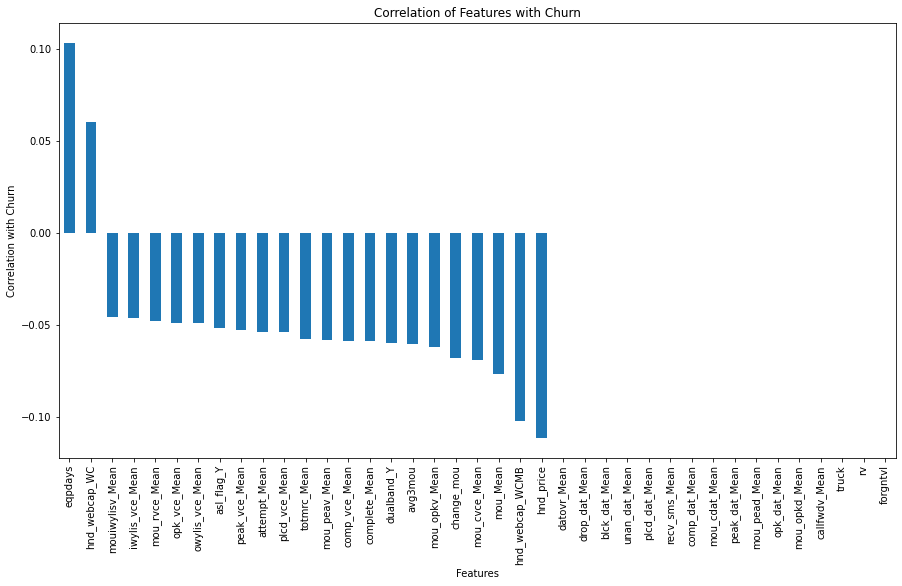

In [ ]:
plt.figure(figsize=(15, 8))
correlation_with_churn = telco_data_cleaned[keys].corr()['churn'].sort_values(ascending=False)
correlation_with_churn = correlation_with_churn.drop('churn')  # Exclude 'churn' from the correlation series
correlation_with_churn.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.title('Correlation of Features with Churn')
plt.show()

Finding correlation is really not helping here much, as many features are non-linearly coordinated here; and highest correlation among linear features are only around 0.1.

### 4. Train-test splitting

In [ ]:
# Split data into features (X) and target variable (y)
X = telco_data_cleaned.drop(columns=['churn'])
y = telco_data_cleaned['churn']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 5. Model selection - Gaussian Naive Bayes classifier

Performance Metrics for Gaussian Naive Bayes Classifier:
Accuracy: 0.5633581796783053
ROC-AUC Score: 0.5893907297418002
Precision: 0.5532852564102564
Recall: 0.7135107207439938
F1 Score: 0.6232652600699538


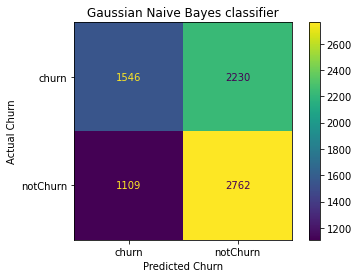

In [ ]:
# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)
y_pred_probs = gnb.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy_gnb = accuracy_score(y_test, y_pred)
roc_auc_gnb = roc_auc_score(y_test, y_pred_probs)
precision_gnb = precision_score(y_test, y_pred)
recall_gnb = recall_score(y_test, y_pred)
f1_gnb = f1_score(y_test, y_pred)
conf_matrix_gnb = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Performance Metrics for Gaussian Naive Bayes Classifier:")
print("Accuracy:", accuracy_gnb)
print("ROC-AUC Score:", roc_auc_gnb)
print("Precision:", precision_gnb)
print("Recall:", recall_gnb)
print("F1 Score:", f1_gnb)
cmd_obj = ConfusionMatrixDisplay(conf_matrix_gnb, display_labels=['churn', 'notChurn'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Gaussian Naive Bayes classifier', 
                xlabel='Predicted Churn', 
                ylabel='Actual Churn')
plt.show()

#### 6. Byesian Gaussian Mixture Model

Performance Metrics for Bayesian Gaussian Mixture Model Classifier:
Accuracy: 0.496926899437688
ROC-AUC Score: 0.5009039196830846
Precision: 0.5040431266846361
Recall: 0.38646344613794886
F1 Score: 0.43749086123702297


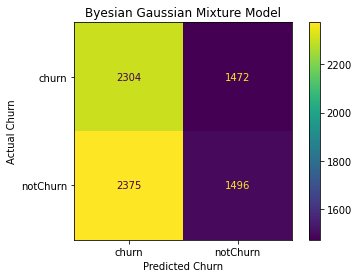

In [ ]:
# Initialize Bayesian Gaussian Mixture Model classifier
bgmm = BayesianGaussianMixture(n_components=2, covariance_type='full', random_state=42)

# Train the classifier
bgmm.fit(X_train)

# Make predictions on the test set
y_pred_probs = bgmm.predict_proba(X_test)[:, 1]
y_pred = bgmm.predict(X_test)

# Calculate performance metrics
accuracy_bgmm = accuracy_score(y_test, y_pred)
roc_auc_bgmm = roc_auc_score(y_test, y_pred_probs)
precision_bgmm = precision_score(y_test, y_pred)
recall_bgmm = recall_score(y_test, y_pred)
f1_bgmm = f1_score(y_test, y_pred)
conf_matrix_bgmm = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Performance Metrics for Bayesian Gaussian Mixture Model Classifier:")
print("Accuracy:", accuracy_bgmm)
print("ROC-AUC Score:", roc_auc_bgmm)
print("Precision:", precision_bgmm)
print("Recall:", recall_bgmm)
print("F1 Score:", f1_bgmm)
cmd_obj = ConfusionMatrixDisplay(conf_matrix_bgmm, display_labels=['churn', 'notChurn'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Byesian Gaussian Mixture Model', 
                xlabel='Predicted Churn', 
                ylabel='Actual Churn')
plt.show()

Performance Metrics for Bayesian Decision Tree Classifier:
Accuracy: 0.5553811952399634
ROC-AUC Score: 0.5552020757348208
Precision: 0.5597867479055598
Recall: 0.569620253164557
F1 Score: 0.5646606914212547


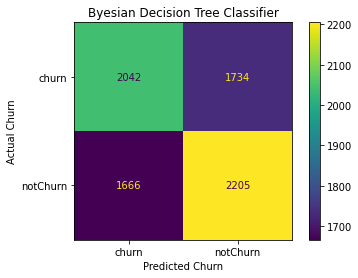

In [ ]:
# Initialize Bayesian Decision Tree classifier
bdt = DecisionTreeClassifier()

# Train the classifier
bdt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bdt.predict(X_test)
y_pred_probs = bdt.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy_bdt = accuracy_score(y_test, y_pred)
roc_auc_bdt = roc_auc_score(y_test, y_pred_probs)
precision_bdt = precision_score(y_test, y_pred)
recall_bdt = recall_score(y_test, y_pred)
f1_bdt = f1_score(y_test, y_pred)
conf_matrix_bdt = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Performance Metrics for Bayesian Decision Tree Classifier:")
print("Accuracy:", accuracy_bdt)
print("ROC-AUC Score:", roc_auc_bdt)
print("Precision:", precision_bdt)
print("Recall:", recall_bdt)
print("F1 Score:", f1_bdt)
cmd_obj = ConfusionMatrixDisplay(conf_matrix_bdt, display_labels=['churn', 'notChurn'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Byesian Decision Tree Classifier', 
                xlabel='Predicted Churn', 
                ylabel='Actual Churn')
plt.show()